In [7]:
canvas = np.zeros((100, 100))
cv2.circle(canvas, (50, 50), 20, (255, 255, 255), thickness=3)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

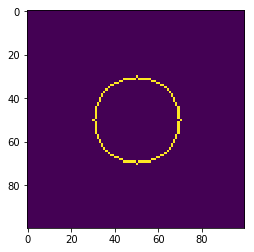

In [5]:
plt.imshow(canvas)

In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
from mmdet.apis import init_detector, inference_detector, show_result_pyplot
import mmcv